This notebook has been created from the following links
* [GBM tutorial](http://nbviewer.jupyter.org/urls/s3.amazonaws.com/datarobotblog/notebooks/gbm-tutorial.ipynb)
* [ensemble methods](http://scikit-learn.org/stable/modules/ensemble.html)
* [examples of using Matplotlib](http://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut2.html)
* [splitting into training and test](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* [Gradient boosting deviance plots](http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html)

In [1]:
# from sklearn.datasets import make_hastie_10_2
# from sklearn.cross_validation import train_test_split
# from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def ground_truth(x):
    ' Ground truth: function to approximate '
    return x * np.sin(x) + np.sin(2 * x)

In [3]:
n_samples = 200
x = np.random.uniform(0, 10, size=n_samples)
x.sort()

In [21]:
# generate data by adding random noise
y = ground_truth(x) + 0.75 * np.random.normal(size=n_samples)

x_data = x[:, np.newaxis]
y_data = y[:, np.newaxis]

In [34]:
# use the more muted seaborn palette
pal = sns.color_palette()

def plot_data():
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(1, 1, 1) 
    ax.plot(x, ground_truth(x), color=pal[1])
    ax.scatter(x, y, s=10, color=pal[2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    return ax

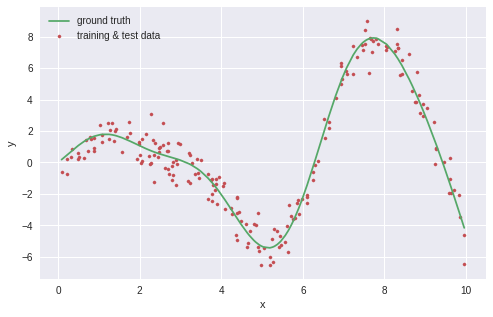

In [35]:
ax = plot_data()
ax.legend(['ground truth', 'training & test data'])

Fit an individual regression tree

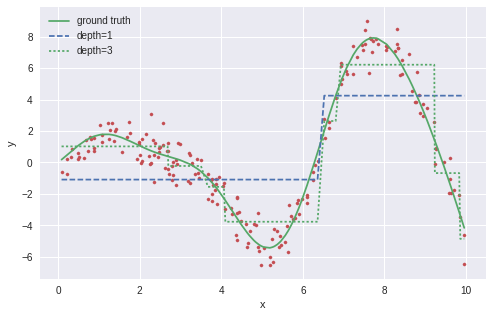

In [38]:
from sklearn.tree import DecisionTreeRegressor
ax = plot_data()
est = DecisionTreeRegressor(max_depth=1)
est.fit(x_data, y_data)
ax.plot(x_data, est.predict(x_data), linestyle='dashed',
        label='depth=1')

est = DecisionTreeRegressor(max_depth=3)
est.fit(x_data, y_data)
ax.plot(x_data, est.predict(x_data), linestyle='dotted',
        label='depth=3')
ax.legend(['ground truth', 'depth=1', 'depth=3'])

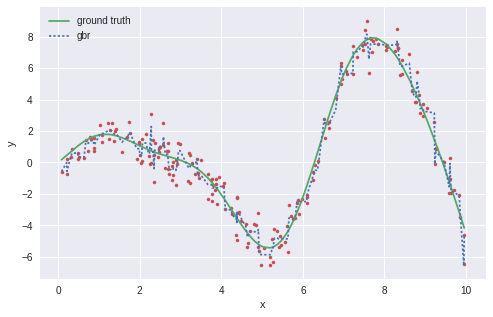

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
ax = plot_data()
est = GradientBoostingRegressor(
    n_estimators=1000, max_depth=1, learning_rate=1.0)
est.fit(x_data, y)
ax.plot(x_data, est.predict(x_data), linestyle='dotted',
        label='gbr')
ax.legend(['ground truth', 'gbr'])

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [101]:
n_estimators = 1000
est = GradientBoostingRegressor(
    n_estimators=n_estimators, max_depth=1, learning_rate=1.0)
est.fit(x_train[:, np.newaxis], y_train)
test_score = np.zeros(n_estimators)
for i, y_pred in enumerate(est.staged_predict(x_test[:, np.newaxis])):
    test_score[i] = est.loss_(y_test, y_pred)

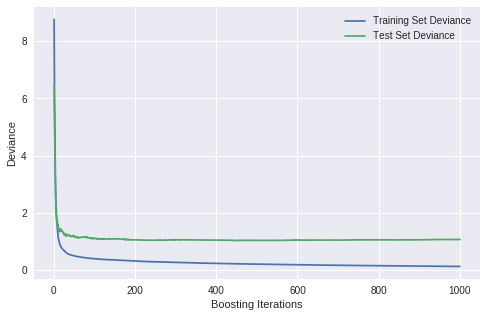

In [102]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.arange(n_estimators) + 1, est.train_score_,
        label='Training Set Deviance')
ax.plot(np.arange(n_estimators) + 1, test_score,
         label='Test Set Deviance')
ax.legend(loc='upper right')
ax.set_xlabel('Boosting Iterations')
ax.set_ylabel('Deviance')